In [1]:
# importing of modules for CIFAR-100 CNN
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [2]:
#training constants
BATCH_SIZE = 50 #Default 50
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')

Main variables initialised.


In [3]:
# CIFAR_100 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [4]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

# Manually split the training data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(input_X_train, output_Y_train, test_size=VALIDATION_SPLIT, random_state=42)

# Print the shapes of the resulting datasets
print('Training set shape:', X_train_split.shape)
print('Validation set shape:', X_val_split.shape)

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)


Sample input image: [[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1. 

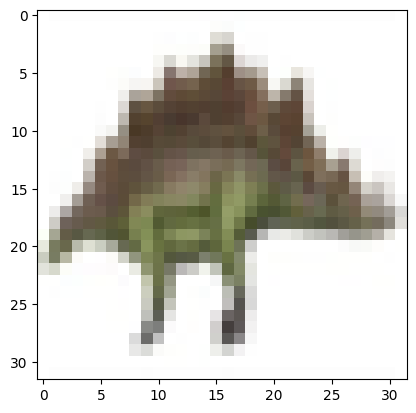

Sample input image: [[[0.12156863 0.2627451  0.47843137]
  [0.11764706 0.26666668 0.4862745 ]
  [0.12156863 0.27058825 0.49411765]
  ...
  [0.1254902  0.27450982 0.5058824 ]
  [0.1254902  0.27450982 0.49019608]
  [0.1254902  0.27058825 0.47843137]]

 [[0.11372549 0.26666668 0.49411765]
  [0.10980392 0.27058825 0.5019608 ]
  [0.11764706 0.27058825 0.50980395]
  ...
  [0.1254902  0.27450982 0.5137255 ]
  [0.1254902  0.27058825 0.49803922]
  [0.12156863 0.27058825 0.4862745 ]]

 [[0.11764706 0.2627451  0.49411765]
  [0.11372549 0.26666668 0.5019608 ]
  [0.11764706 0.27058825 0.50980395]
  ...
  [0.1254902  0.28235295 0.5176471 ]
  [0.12156863 0.27450982 0.50980395]
  [0.11764706 0.27058825 0.49803922]]

 ...

 [[0.15294118 0.16078432 0.29803923]
  [0.14901961 0.16470589 0.29803923]
  [0.14901961 0.17254902 0.30588236]
  ...
  [0.15294118 0.17254902 0.30980393]
  [0.14901961 0.16470589 0.3019608 ]
  [0.15294118 0.16078432 0.29803923]]

 [[0.15686275 0.15294118 0.28627452]
  [0.15294118 0.1

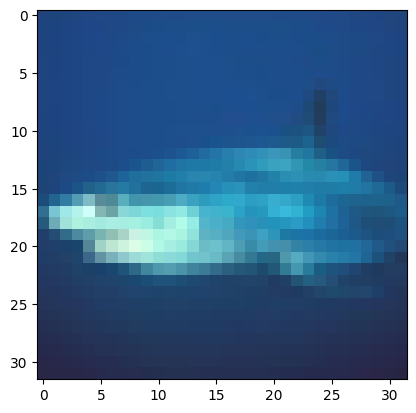

In [5]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 1
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

Selected_Image = 49999
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

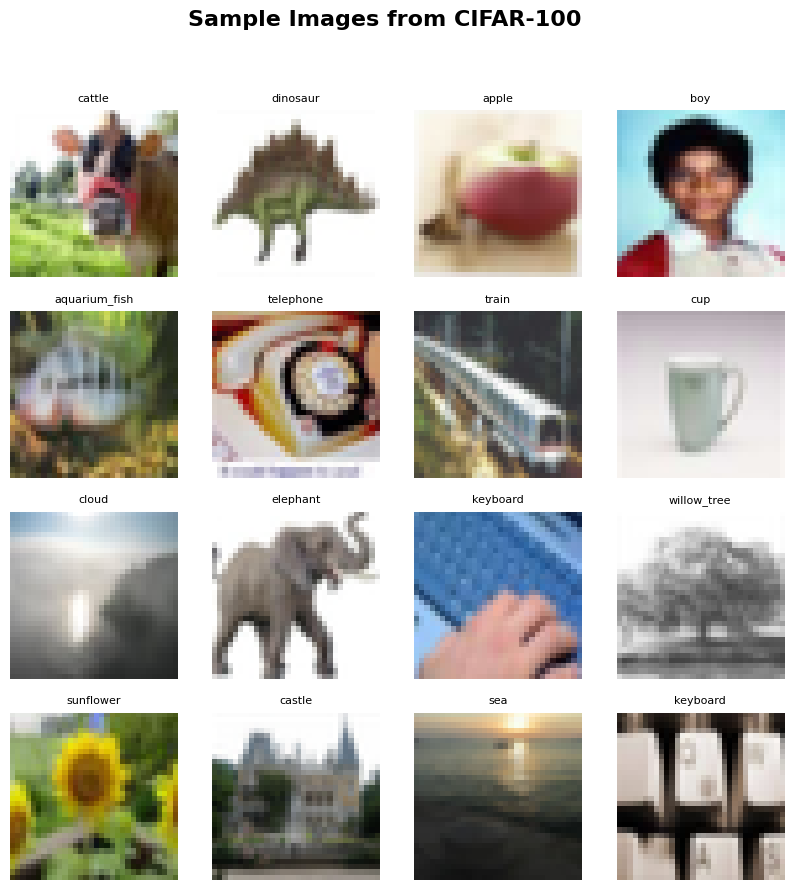

In [6]:
# Plot 16 sample images with titles
# CIFAR-100 class labels

cifar100_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose",
    "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel",
    "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

plt.figure(figsize=(10, 10))

for i in range(4 * 4):
    plt.subplot(4, 4, i+1)
    plt.imshow(input_X_train[i])
    plt.title(cifar100_labels[output_y_train[i][0]], fontsize=8)  # Title for each image
    plt.axis('off')

# Add a main title
plt.suptitle("Sample Images from CIFAR-100", fontsize=16, fontweight='bold')

plt.show()

In [7]:
# Define the function to create a new model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(512, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('elu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [8]:
# compile the model
model = create_model(input_X_train.shape[1:], N_CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001, decay = 1e-6), metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,777,060 (25.85 MB)

 Trainable params: 6,777,060 (25.85 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# augumenting
print("Augmenting training set images...")
datagen = ImageDataGenerator(
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)

datagen.fit(X_train_split)

Augmenting training set images...



Run 1...
Training Model...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.0254 - loss: 4.4462 - val_accuracy: 0.1093 - val_loss: 3.8309
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.1065 - loss: 3.8112 - val_accuracy: 0.1851 - val_loss: 3.3638
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.1669 - loss: 3.4584 - val_accuracy: 0.2435 - val_loss: 3.0606
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.2201 - loss: 3.1688 - val_accuracy: 0.2757 - val_loss: 2.9374
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.2583 - loss: 2.9527 - val_accuracy: 0.3107 - val_loss: 2.7511
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.3012 - loss: 2.7673 - val_accuracy: 0.3577 - val_loss: 2.5379
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.3328 - loss: 2.6022 - val_accuracy: 0.3762 - val_loss: 2.4037
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.3685 - loss: 2.4655 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.0249 - loss: 4.4343 - val_accuracy: 0.1024 - val_loss: 3.8325
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.1049 - loss: 3.8343 - val_accuracy: 0.1844 - val_loss: 3.3755
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.1683 - loss: 3.4392 - val_accuracy: 0.2573 - val_loss: 3.0098
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.2271 - loss: 3.1484 - val_accuracy: 0.2903 - val_loss: 2.8249
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.2682 - loss: 2.9360 - val_accuracy: 0.3080 - val_loss: 2.7363
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.3040 - loss: 2.7601 - val_accuracy: 0.3586 - val_loss: 2.5011
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.3361 - loss: 2.5880 - val_accuracy: 0.3680 - val_loss: 2.4561
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.3630 - loss: 2.4503 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.0235 - loss: 4.4464 - val_accuracy: 0.1032 - val_loss: 3.8372
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.1062 - loss: 3.8376 - val_accuracy: 0.1654 - val_loss: 3.4815
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.1691 - loss: 3.4487 - val_accuracy: 0.2519 - val_loss: 3.0147
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.2229 - loss: 3.1617 - val_accuracy: 0.2843 - val_loss: 2.8679
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.2642 - loss: 2.9418 - val_accuracy: 0.3272 - val_loss: 2.6400
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.2972 - loss: 2.7637 - val_accuracy: 0.3426 - val_loss: 2.5434
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.3277 - loss: 2.6278 - val_accuracy: 0.3674 - val_loss: 2.4259
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.3631 - loss: 2.4653 - val_accurac

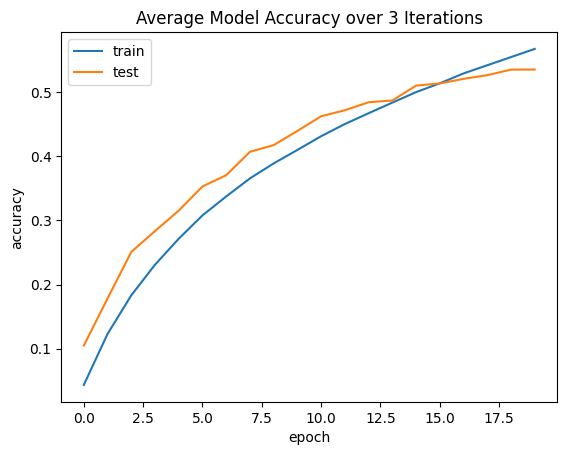

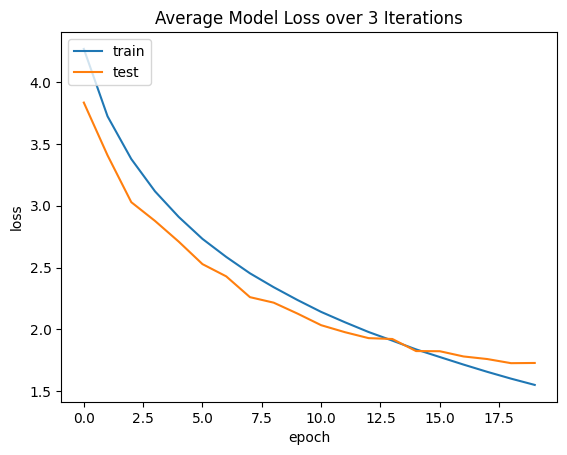

Test Accuracies:  [0.5415999889373779, 0.5414000153541565, 0.5449000000953674]


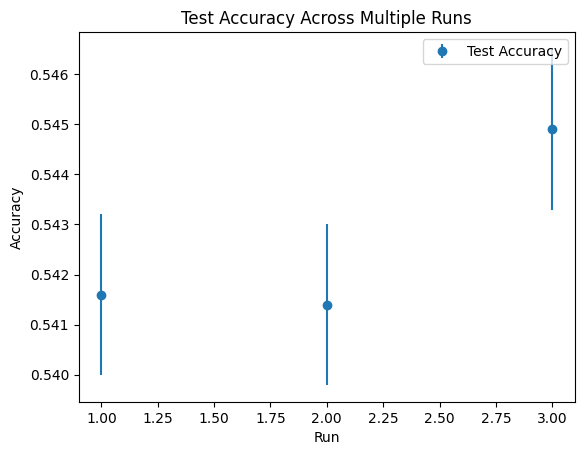

Test Losses:  [1.6969234943389893, 1.7324472665786743, 1.6998355388641357]


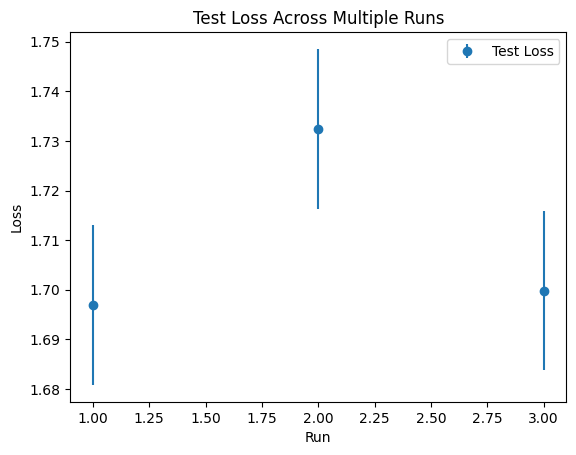

Test Precisions:  [0.555591818874218, 0.5573625292405718, 0.5563457145112787]


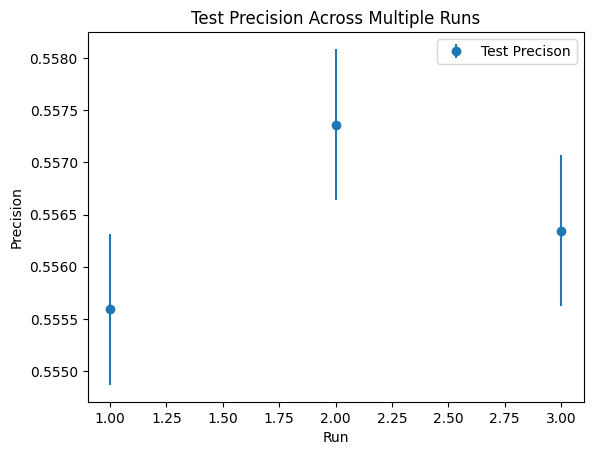

Test Recalls:  [0.5416, 0.5414, 0.5449]


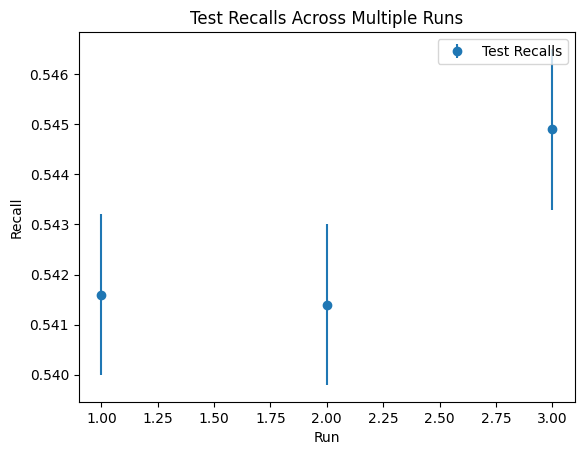

Test F1 Scores [0.53854218279584, 0.5366456645945936, 0.5375869707223371]


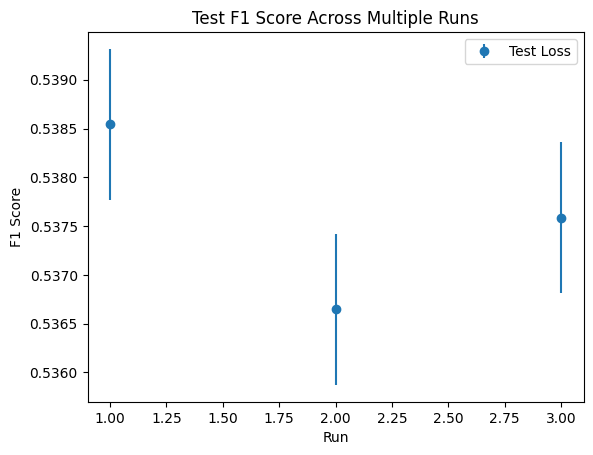

Average Test Accuracy: 0.5426 ± 0.0016
Average Test Precision: 0.5564 ± 0.0007
Average Test Recall: 0.5426 ± 0.0016
Average Test F1 Score: 0.5376 ± 0.0008


In [10]:
# Store metrics for each run
train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []
test_losses = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []

# Run the model 3 times (or more)
for run in range(3):
    print(f"\nRun {run + 1}...")
    
    # Train the model
    # training/fitting of the complex DNN model
    print("Training Model...")
    
    # Reinitialize the model for a fresh start
    model = create_model(input_X_train.shape[1:], N_CLASSES)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001, decay = 1e-6), metrics=['accuracy'])

    history = model.fit(datagen.flow(X_train_split, Y_train_split, batch_size=BATCH_SIZE), epochs=N_EPOCH, validation_data=(X_val_split, Y_val_split), 
                    verbose=VERBOSE)

    # Store the training accuracy for each epoch
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    print("\nTesting Model...\n")
    # Evaluate the model on the test set
    test_score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    
    # Store the test metrics
    test_losses.append(test_score[0])
    test_accuracies.append(test_score[1])
    
    # You can also calculate precision, recall, and F1 score
    Y_pred = model.predict(input_X_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(output_Y_test, axis=1)
    
    precision = precision_score(Y_true, Y_pred_classes, average='weighted')
    recall = recall_score(Y_true, Y_pred_classes, average='weighted')
    f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
    
    test_precisions.append(precision)
    test_recalls.append(recall)
    test_f1_scores.append(f1)

# Convert the list of accuracy values into a numpy array for easier manipulation
train_accuracies = np.array(train_accuracies)
val_accuracies = np.array(val_accuracies)
print("Training Accuracy Arrays for Each Run: ", train_accuracies)
print("Validation Accuracy Arrays for Each Run: ", val_accuracies)

# Compute the average accuracy for each epoch across all runs
avg_train_accuracy = train_accuracies.mean(axis=0)
avg_val_accuracy = val_accuracies.mean(axis=0)

# Convert the list of loss values into a numpy array for easier manipulation
train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

# Compute the average loss for each epoch across all runs
avg_train_loss = train_losses.mean(axis=0)
avg_val_loss = val_losses.mean(axis=0)

# summarize history for accuracy
#plt.plot(mo)
plt.plot(avg_train_accuracy)
plt.plot(avg_val_accuracy)
plt.title('Average Model Accuracy over 3 Iterations')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(avg_train_loss)
plt.plot(avg_val_loss)
plt.title('Average Model Loss over 3 Iterations')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Compute the average and standard deviation for each metric
print("Test Accuracies: ", test_accuracies)
avg_test_accuracy = np.mean(test_accuracies)
std_test_accuracy = np.std(test_accuracies)

# Plot test accuracy with error bars
plt.errorbar(range(1, 4), test_accuracies, yerr=std_test_accuracy, fmt='o', label='Test Accuracy')
plt.title('Test Accuracy Across Multiple Runs')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Test Losses: ", test_losses)
avg_test_loss = np.mean(test_losses)
std_test_loss = np.std(test_losses)

# Plot test accuracy with error bars
plt.errorbar(range(1, 4), test_losses, yerr=std_test_loss, fmt='o', label='Test Loss')
plt.title('Test Loss Across Multiple Runs')
plt.xlabel('Run')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Test Precisions: ", test_precisions)
avg_test_precision = np.mean(test_precisions)
std_test_precision = np.std(test_precisions)

# Plot test accuracy with error bars
plt.errorbar(range(1, 4), test_precisions, yerr=std_test_precision, fmt='o', label='Test Precison')
plt.title('Test Precision Across Multiple Runs')
plt.xlabel('Run')
plt.ylabel('Precision')
plt.legend()
plt.show()

print("Test Recalls: ", test_recalls)
avg_test_recall = np.mean(test_recalls)
std_test_recall = np.std(test_recalls)

# Plot test accuracy with error bars
plt.errorbar(range(1, 4), test_recalls, yerr=std_test_recall, fmt='o', label='Test Recalls')
plt.title('Test Recalls Across Multiple Runs')
plt.xlabel('Run')
plt.ylabel('Recall')
plt.legend()
plt.show()

print("Test F1 Scores", test_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
std_test_f1 = np.std(test_f1_scores)

# Plot test accuracy with error bars
plt.errorbar(range(1, 4), test_f1_scores, yerr=std_test_f1, fmt='o', label='Test Loss')
plt.title('Test F1 Score Across Multiple Runs')
plt.xlabel('Run')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


# Print the results
print(f"Average Test Accuracy: {avg_test_accuracy:.4f} ± {std_test_accuracy:.4f}")
print(f"Average Test Precision: {avg_test_precision:.4f} ± {std_test_precision:.4f}")
print(f"Average Test Recall: {avg_test_recall:.4f} ± {std_test_recall:.4f}")
print(f"Average Test F1 Score: {avg_test_f1:.4f} ± {std_test_f1:.4f}")

